In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv('pmsi_analysis_v5.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (1,6,21,23,26,30,33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


### CMD projétés sur le mode d'entrée

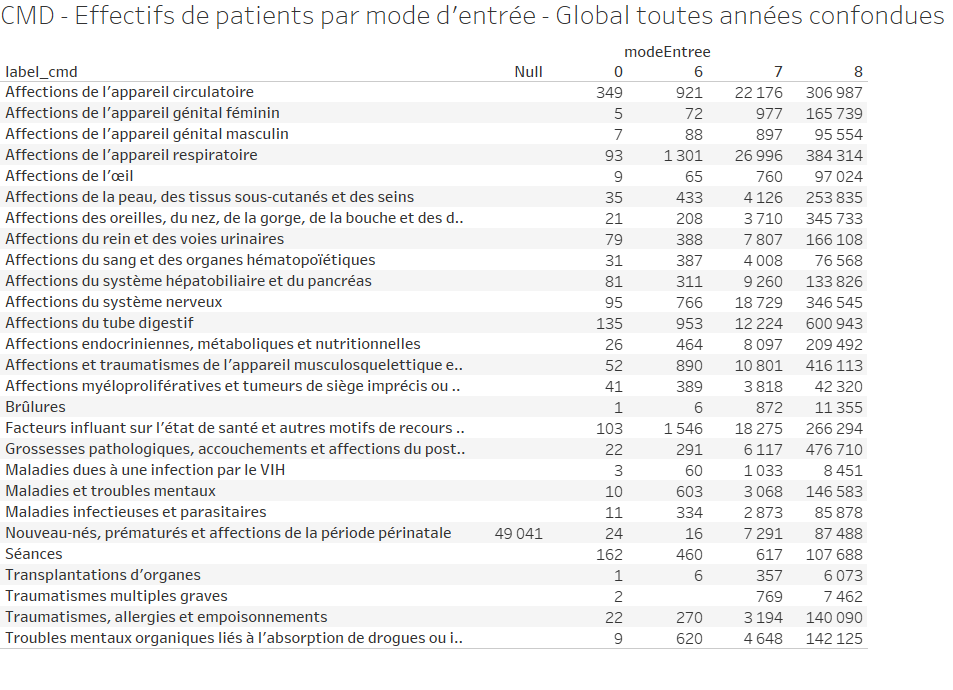

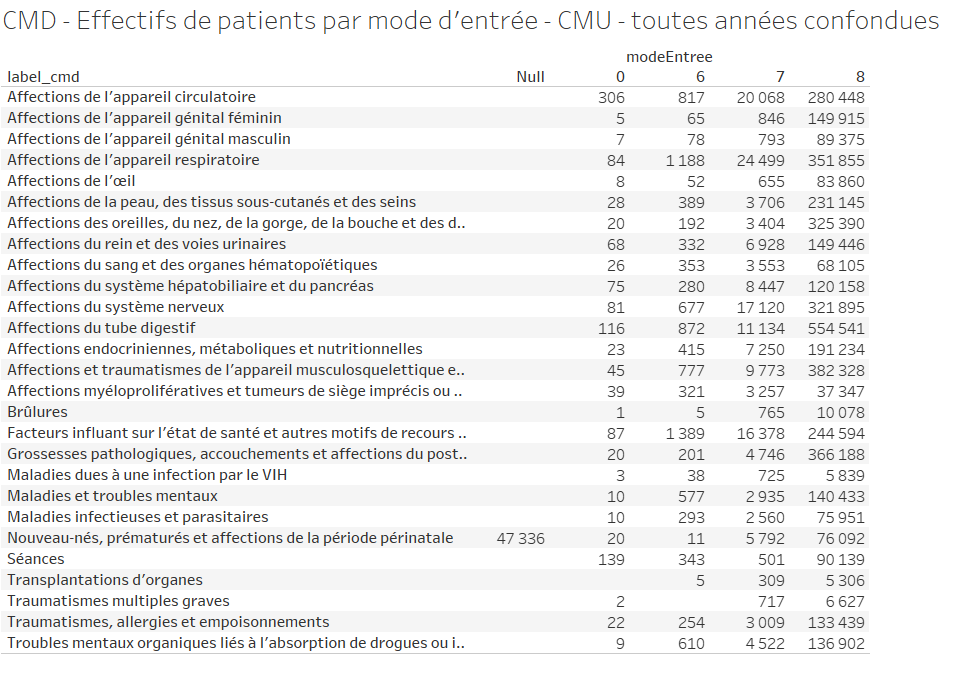

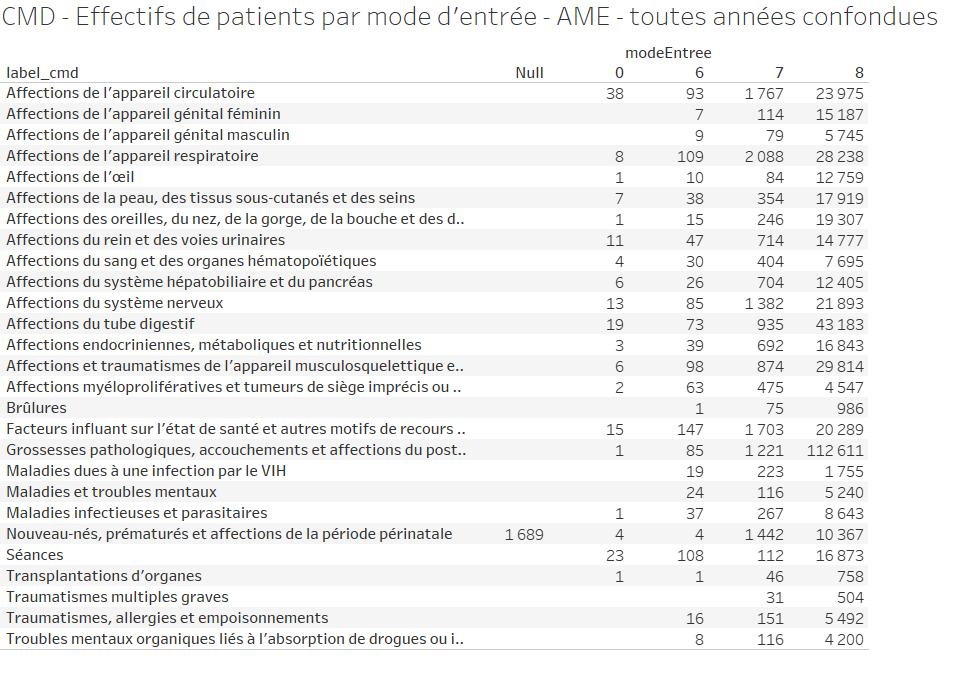

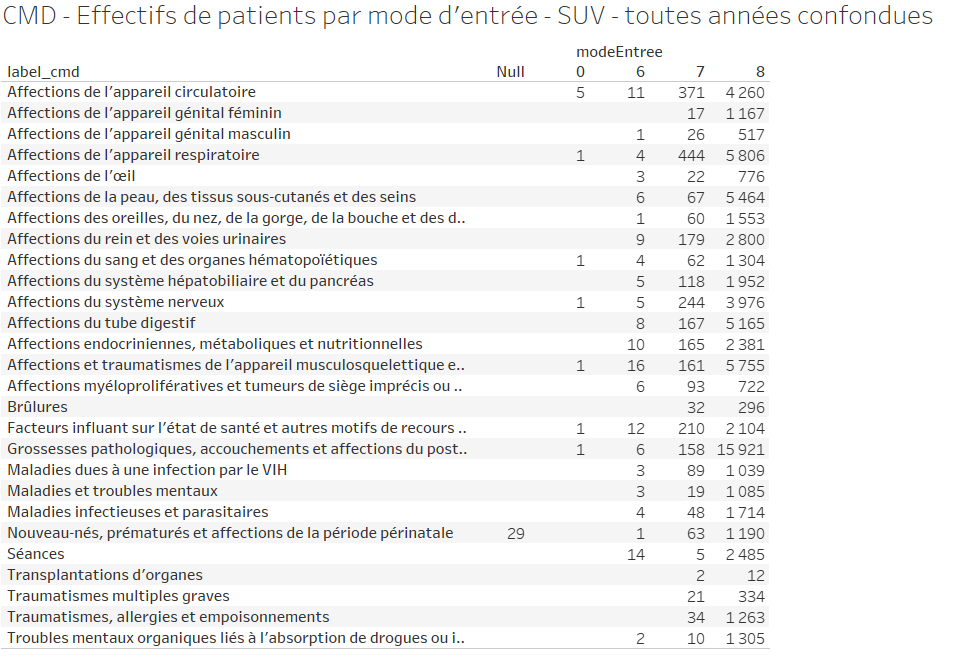

### Nombre de patients ayant au moins un supplément par dispositif

#### Toutes années confondues

In [4]:
df['sup'] = df['supp_rea'] + df['supp_si'] + df['supp_stf'] + df['supp_src']

In [5]:
df['sup_1'] = df['sup'] >= 1

In [6]:
df_sup = df.groupby(['raison','sup_1']).agg({'anonyme':'nunique'})
df_sup = df_sup.reset_index()

In [7]:
df_sup = df_sup[df_sup['sup_1'] == True]

In [8]:
df_r = df.groupby(['raison']).agg({'anonyme':'nunique'})
df_r = df_r.reset_index()

In [9]:
df_r

,raison,anonyme
0,AME,324161
1,CMU,3324451
2,SUV,53891


In [10]:
df_sup['total_dispositif'] = list(df_r['anonyme'])

In [11]:
df_sup['% dispostif'] = df_sup['anonyme']/df_sup['total_dispositif'] *100

In [12]:
df_sup

,raison,sup_1,anonyme,total_dispositif,% dispostif
1,AME,True,25275,324161,7.797051
3,CMU,True,294383,3324451,8.855086
5,SUV,True,6110,53891,11.337700


<AxesSubplot:xlabel='raison', ylabel='% dispostif'>

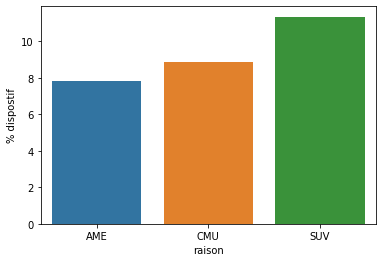

In [13]:
sns.barplot(data=df_sup,x='raison',y='% dispostif')

#### Evolution annuelle

In [14]:
df_sup = df.groupby(['annee','raison','sup_1']).agg({'anonyme':'nunique'})
df_sup = df_sup.reset_index()

In [15]:
df_sup = df_sup[df_sup['sup_1'] == True]

In [16]:
df_r = df.groupby(['annee','raison']).agg({'anonyme':'nunique'})
df_r = df_r.reset_index()

In [17]:
df_sup['total_raison'] = list(df_r['anonyme'])

In [18]:
df_sup['% dispostif'] = df_sup['anonyme']/df_sup['total_raison'] *100

In [19]:
df_sup

,annee,raison,sup_1,anonyme,total_raison,% dispostif
1,2012,AME,True,1797,36846,4.877056
3,2012,CMU,True,22113,368723,5.997185
5,2012,SUV,True,548,7195,7.616400
7,2013,AME,True,2178,43312,5.028629
9,2013,CMU,True,19904,345965,5.753183
11,2013,SUV,True,515,7200,7.152778
13,2014,AME,True,2360,44734,5.275629
15,2014,CMU,True,23069,376018,6.135079
17,2014,SUV,True,551,6756,8.155713
19,2015,AME,True,2715,47704,5.691347


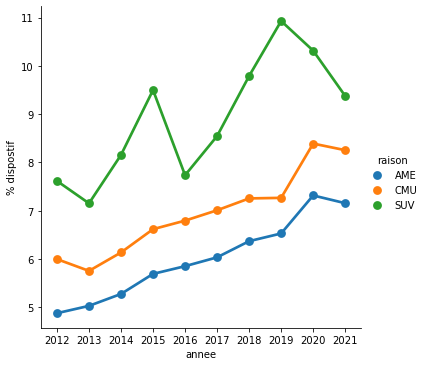

In [20]:
g= sns.catplot(data=df_sup,
           kind='point',
           x='annee',
           y="% dispostif",
           hue='raison',
           palette='tab10',      
           )

### Supplément moyen par dispositif ( vue séjour)

#### Toutes années confondues

In [21]:
df_sup = df.groupby(['raison']).agg({'sup':'mean'})
df_sup = df_sup.reset_index()

In [22]:
df_sup

,raison,sup
0,AME,0.266995
1,CMU,0.325538
2,SUV,0.493880


<AxesSubplot:xlabel='raison', ylabel='sup'>

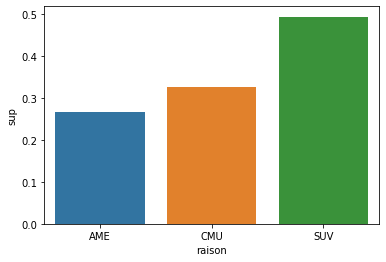

In [23]:
sns.barplot(data=df_sup,x='raison',y='sup')

#### Evolution annuelle

In [24]:
df_sup = df.groupby(['annee','raison']).agg({'sup':'mean'})
df_sup = df_sup.reset_index()

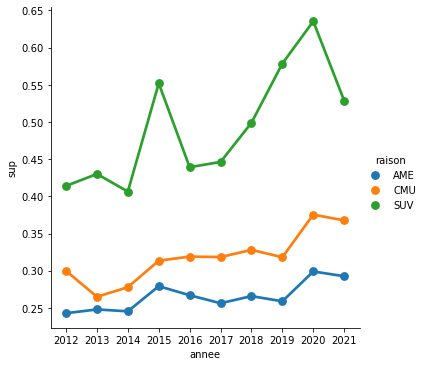

In [25]:
g= sns.catplot(data=df_sup,
           kind='point',
           x='annee',
           y="sup",
           hue='raison',
           palette='tab10',      
           )

### Coût des top ghm par dispositif ( toutes années confondues)

![title](repart_ghm_cost_cmu.png)

![title](repart_ghm_cost_ame.png)

![title](repart_ghm_cost_suv.png)

### Répartition CMD associée aux top ghm

![title](repart_cmd_patients_top_ghm.png)

![title](repart_cmd_patients_top_ghm_cmu.png)

![title](repart_cmd_patients_top_ghm_ame.png)

![title](repart_cmd_patients_top_ghm_suv.png)

In [4]:
df_cmu = pd.DataFrame(None,columns=['annee','cmu_db','cmu_benef'])
df_cmu = df_cmu.append({'annee':2011,'cmu_db':297830,'cmu_benef':2191858},ignore_index=True)
df_cmu = df_cmu.append({'annee':2012,'cmu_db':333782,'cmu_benef':2221931},ignore_index=True)
df_cmu = df_cmu.append({'annee':2013,'cmu_db':311731,'cmu_benef':2242482},ignore_index=True)
df_cmu = df_cmu.append({'annee':2014,'cmu_db':341102,'cmu_benef':2281503},ignore_index=True)
df_cmu = df_cmu.append({'annee':2015,'cmu_db':366951,'cmu_benef':2420965},ignore_index=True)
df_cmu['ratio'] = df_cmu['cmu_db']/df_cmu['cmu_benef'] *100

In [23]:
df_cmu['annee'] = df_cmu['annee'].astype(float)
df_cmu['ratio'] = df_cmu['ratio'].astype(float)

In [24]:
df_cmu

,annee,cmu_db,cmu_benef,ratio
0,2011.0,297830,2191858,13.588015
1,2012.0,333782,2221931,15.022159
2,2013.0,311731,2242482,13.901160
3,2014.0,341102,2281503,14.950758
4,2015.0,366951,2420965,15.157220


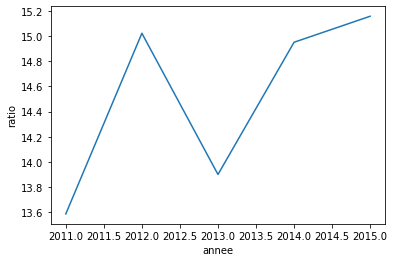

In [25]:
g= sns.lineplot(data=df_cmu,
           x='annee',
           y="ratio",
           palette='tab10',      
           )

#### Reparition Geo dispositif

![title](repart_geo_patient_global_region.png)

![title](repart_geo_patient_cmu_region.png)

![title](repart_geo_patient_ame_region.png)

![title](repart_geo_patient_suv_region.png)